In [1]:
#Import Libraries
import pandas as pd
import string
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import rcParams
import pandas as pd
from collections import Counter
from itertools import chain
#from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings("ignore")
import collections
import os
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
rcParams['figure.figsize'] = 20,12
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the data
reviews = pd.read_csv(r"reviews_all_new.csv")
#drop unwanted column
reviews.drop(columns = ["Unnamed: 0"], inplace = True)
stop1 = ['food','good','nice','price','place','servic','restaur','visit','friendli','thessaloniki','order','great','dish','recommend','amaz','one','realli','us','serv','staff','qualiti','’','time', 'tri', 'experi', 'come', 'small', 'local', 'even', 'excel', 'reason', 'atmospher', 'best', 'love', 'enjoy', 'would', 'greek', 'well', 'also', 'fresh', 'back', 'like', 'tast', 'wine', 'definit', 'tabl', 'offer', 'menu', 'salad', 'drink', 'waiter', 'tradit', 'tasti', 'delici', 'day', 'peopl', 'go', 'meal', 'fish', 'dinner', 'eat', 'cook', 'portion', 'look', 'meat', 'citi', 'everyth', 'music', 'locat', 'lunch','town', 'warm', 'year', 'outsid', 'street', 'chicken', 'coffe', 'night', 'perfect', 'much', 'want', 'view', 'got', 'plate', 'littl', 'sea', 'expect', 'owner', 'ok', 'make', 'way', 'next', 'sit', 'wait', 'pizza', 'friend', 'cuisin', 'high', 'lot', 'differ', 'kind', 'noth', 'special', 'choic', 'decor', 'live', 'greec', 'alway', 'center', 'better', 'bread', 'ask', 'help', 'dont', 'get', 'mani', 'top', 'fantast', 'thing', 'say', 'two', 'first', 'didnt', 'busi', 'went', 'came', 'cours', 'though', 'polit', 'find', 'fast', 'end', 'grill', 'take', 'found', 'ever', 'quit', 'euro', 'wonder', 'everi', 'starter', 'bar', 'area', 'main', '2', 'full', 'hous', 'highli', 'could', 'burger', 'chees', 'made', 'big', 'valu', 'must', 'select', 'smoke', 'beauti', 'last', 'around', 'someth', 'varieti', 'money', 'feel', 'fri', 'beer', 'seafood', 'bit', 'insid', 'sure', 'worth', 'expens', 'disappoint', 'need', 'ate', 'famili', 'dessert','\"','”','“']

# Preprocessing 

In [3]:
# Remove punctuation
reviews['Review'] = reviews['Review'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
#Lower case everything
reviews['Review'] = reviews['Review'].str.lower()
reviews['Review_Distribution'] = reviews['Review_Distribution'].str.lower()
#Tokenize the reviews
reviews['Review'] = reviews.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)
#Remove stopwords
reviews['Review'] = reviews['Review'].apply(lambda x: [item for item in x if item not in stop])
#Stemming
reviews['Review'] = reviews['Review'].apply(lambda x: [ps.stem(y) for y in x])

#get the month
reviews['Rating_Month'] = reviews["Rating_date"].str.split(" ").str[0]
#get the year
reviews['Rating_Year'] = reviews["Rating_date"].str.split(",").str[1]
reviews['Rating_Year'] = reviews["Rating_Year"].str.replace(" ","")

#Create a new dataframe that contains the reviews and remove the extra stopwords
reviews_lda = reviews.copy()
reviews_lda['Review'] = reviews_lda['Review'].apply(lambda x: [item for item in x if item not in stop1])

# Sentiment Analysis

In [39]:
from textblob import TextBlob

## Polarity Score

In [40]:
#Calculate the polarity of a text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Unify a list of words and separate them by whitespace
def list_to_txt(item):
    str =' '.join(item)
    return str

In [41]:
#Unify the tokens that each review contains
unified_reviews_txt = list(map(list_to_txt, reviews["Review"]))

#Calculate the polarity of each review and store it in a dataframe
polarities = list(map(getPolarity, unified_reviews_txt))
polarities_df = pd.DataFrame(data = [unified_reviews_txt, polarities]).T

#Sort the reviews based on their polarity
polarities_df_sorted = polarities_df.sort_values(by = 1)

In [42]:
polarity_scores_for_concat = polarities_df[1]

In [43]:
#Print the top-5 negative reviews
polarities_df_sorted[0][0:5]

2257     eat hungri believ one worst place ever eat nev...
11291    eat worst thing vacat seafood frozen wait 15 h...
14358    dirti place terribl servic waiter behav improp...
5232     one day order spetsofai mayb worst food ive ev...
1875     rudenessaw servic treat u like anim credit car...
Name: 0, dtype: object

In [44]:
#Print the top-5 positive reviews
polarities_df_sorted[0][-6:-1]

7531     best icecream staff friendli environ come ever...
8024     food servic perfect lot thing choos tast food ...
6293     marvel restaur exquisit cuicineexcel servic be...
8672     omgthi probabl best steak ever lot steaksw com...
13417    that place best brunch citi drop lunch cocktai...
Name: 0, dtype: object

## Most Common Words in Positive and Negative Reviews

In [45]:
#Split the positive and negative reviews in separate dataframes
positive_reviews_df = polarities_df_sorted[polarities_df[1] > 0]
negative_reviews_df = polarities_df_sorted[polarities_df[1] < 0]

In [46]:
#Store the words that are used in positive reviews and count their frequency.
word_count_positive = positive_reviews_df[0].str.split(expand = True).stack().value_counts()
#Extract the 20 most frequent words in positive reviews
most_positive_words = word_count_positive[0:20]

#Store the words that are used in negative reviews and count their frequency.
word_count_negative = negative_reviews_df[0].str.split(expand = True).stack().value_counts()
#Extract the 20 most frequent words in negative reviews
most_negative_words = word_count_negative[0:20]

<AxesSubplot:>

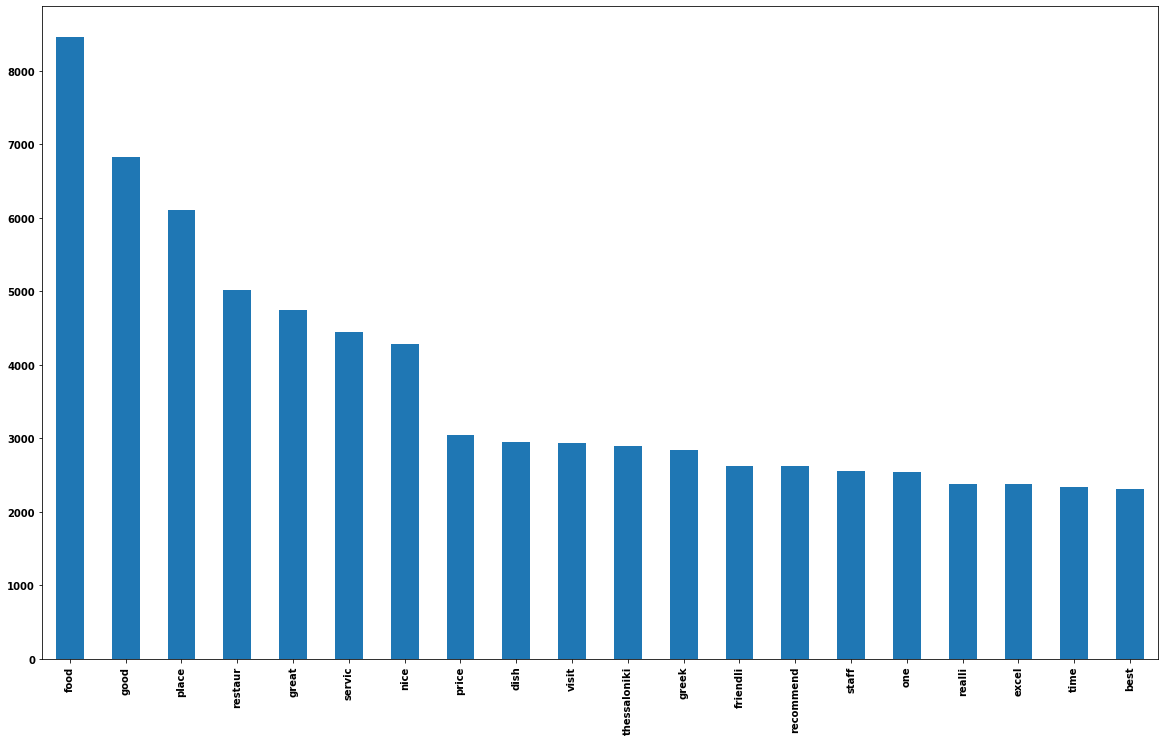

In [47]:
#Create a bar plot with the 20 most frequent words in positive reviews
most_positive_words.plot.bar()

<AxesSubplot:>

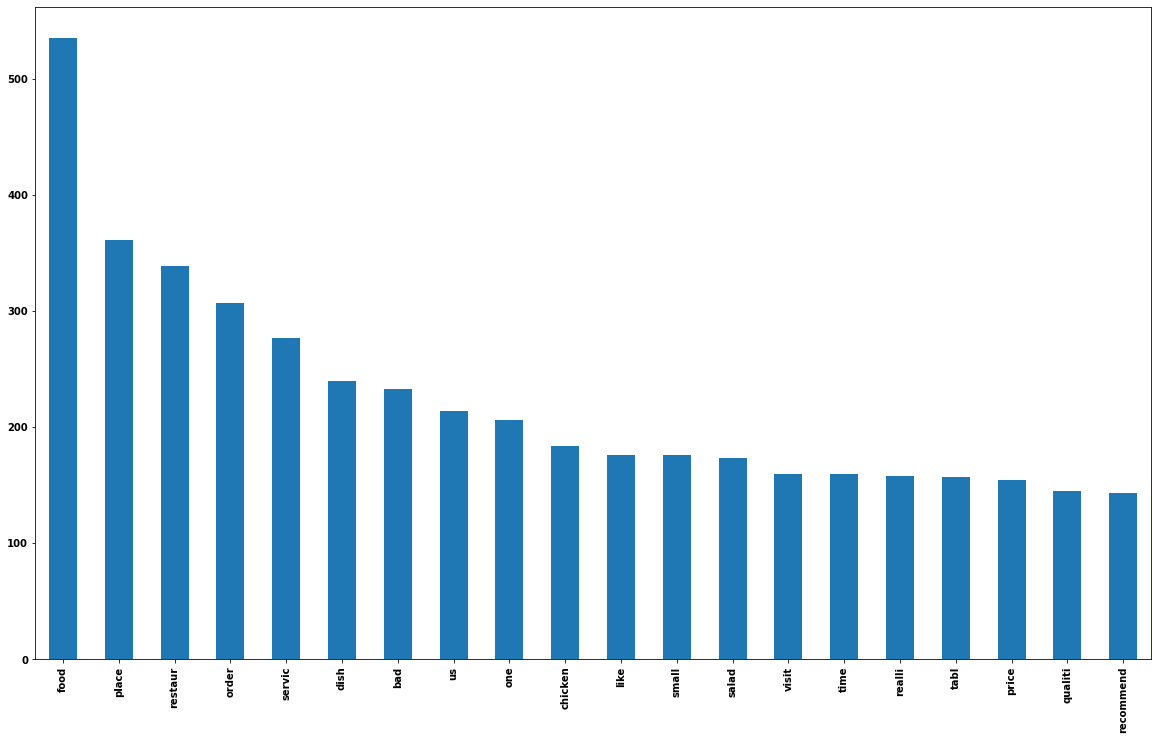

In [48]:
#Create a bar plot with the 20 most frequent words in negative reviews
most_negative_words.plot.bar()

## Polarity Score per Restaurant

In [49]:
#Concat reviews with their polarity
reviews_with_polarities = pd.concat([reviews, polarity_scores_for_concat], axis = 1)

In [50]:
#The dataframe is grouped by "restaurant" and the mean polarity is calculated for each one
mean_polarities_per_restaurants = reviews_with_polarities.groupby(["Business_Name"])[1].mean()
df_mean_polarities_per_restaurants = pd.DataFrame(mean_polarities_per_restaurants)

In [51]:
#Print the 10 restaurants with the highest polarity score
best_10_restaurants = df_mean_polarities_per_restaurants.sort_values(by = 1)[-11:-1]
best_10_restaurants

,1
Business_Name,
AROMA CAFE,0.80
GRILLS AND FRIES,0.80
DIKTAMO,0.80
MAGIC BUS CAFE,0.82
VICKY,0.85
BARKO,0.90
OLD FACTORY CAFE,0.90
R2 STORE,1.00
SALLIARIS,1.00


In [52]:
#Print the 10 restaurants with the lowest polarity score
worst_10_restaurants = df_mean_polarities_per_restaurants.sort_values(by=1)[0:10]
worst_10_restaurants

,1
Business_Name,
LOS HERMANOS,-1.000000
MINIMAL ALL DAY COFFEE HOUSE,-0.600000
LOONEY BEAN,-0.234848
ALEXANDROS NTINOS,-0.220000
157 STREET,-0.139286
SYN TROFI,-0.128472
MUZIK BAR CAFE,-0.122500
GKAZOZA MEZEDOPOLEIO BAR,-0.108058
FIVE FINGERS,-0.094444


In [53]:
#Calculate the number of the reviews of each restaurant
number_of_reviews_per_restaurants = reviews_with_polarities.groupby(["Business_Name"])["Score"].count()
reviews_df = pd.DataFrame([mean_polarities_per_restaurants, number_of_reviews_per_restaurants])
reviews_df = reviews_df.T
reviews_df.rename(columns={1:"polarity_score","Score":"Count_of_reviews"}, inplace=True)

#Keep restaurants that have more than 20 reviews and sort them based on their polarity score
sorted_reviews_df = reviews_df[reviews_df["Count_of_reviews"]>20].sort_values(by="polarity_score")

In [54]:
sorted_reviews_df

,polarity_score,Count_of_reviews
Business_Name,,
TO KOURDISTO GOUROUNI,0.237654,36.0
PALATI,0.256651,30.0
OLIVE OIL & OREGANO,0.261025,26.0
KOI SUSHI BAR,0.261874,32.0
O GYROS TIS ELLADOS,0.264169,23.0
...,...,...
RIVIERA BEACH BAR,0.411403,25.0
GIOK BALIK,0.411667,30.0
CHAN,0.412019,22.0


In [55]:
#Print the 10 restaurants with the largest polarity score
top_restaurants_with_over_20_reviews = sorted_reviews_df.iloc[145:155,:]
top_restaurants_with_over_20_reviews

,polarity_score,Count_of_reviews
Business_Name,,
CHRISTOFER SEA FOOD,0.386177,23.0
KIOUPIA LADADIKA,0.386402,133.0
STAFILI,0.387195,23.0
ARC ESPRESSO WINE BAR,0.388047,45.0
U FLEKU,0.394124,23.0
RIVIERA BEACH BAR,0.411403,25.0
GIOK BALIK,0.411667,30.0
CHAN,0.412019,22.0
SPOON THESSALONIKI - Restaurant Reviews,0.417148,25.0


In [56]:
#Print the 10 restaurants with the lowest polarity score
worst_restaurants_with_over_20_reviews = sorted_reviews_df.iloc[0:10,:]
worst_restaurants_with_over_20_reviews

,polarity_score,Count_of_reviews
Business_Name,,
TO KOURDISTO GOUROUNI,0.237654,36.0
PALATI,0.256651,30.0
OLIVE OIL & OREGANO,0.261025,26.0
KOI SUSHI BAR,0.261874,32.0
O GYROS TIS ELLADOS,0.264169,23.0
PADRINO SKG FOOD STORIES,0.264193,40.0
LA PASTERIA,0.268273,21.0
EXTRAVAGANZA,0.277411,75.0
MOLYVOS RESTAURANT,0.277487,107.0


In [57]:
#Calculate the mean score of each restaurant
restaurants_plus_scores = reviews.groupby(["Business_Name"])["Score"].mean().sort_values()
restaurants_plus_scores

Business_Name
LOS HERMANOS                   10.0
ASIAN HOUSE TOUMPA             10.0
MODIANO RETSINADIKO            10.0
TAVERNA SOTIRIS                10.0
TOMMY COFFEE HOUSE & EATERY    10.0
                               ... 
MEZEDAKI BAR                   50.0
MEZEDAGOGION                   50.0
MEZALIKI                       50.0
MERRY BERRY HEALTH BAR         50.0
ΤΡΕΛΑ ΠΙΡΟΥΝΙΑ                 50.0
Name: Score, Length: 689, dtype: float64

In [58]:
#Keep the restaurant with the highest scores
top_restaurants_by_score = restaurants_plus_scores[679:689]
top_restaurants_by_score

Business_Name
MINIMAL ALL DAY COFFEE HOUSE    50.0
MIMIS                           50.0
MILONGA MEZE CLUB               50.0
MIKRI MARMITA                   50.0
MEZEDOPOLEIO ZAIR 79            50.0
MEZEDAKI BAR                    50.0
MEZEDAGOGION                    50.0
MEZALIKI                        50.0
MERRY BERRY HEALTH BAR          50.0
ΤΡΕΛΑ ΠΙΡΟΥΝΙΑ                  50.0
Name: Score, dtype: float64

In [59]:
#Keep the restaurant with the lowest scores
worst_restaurants_by_score = restaurants_plus_scores[0:10]
worst_restaurants_by_score

Business_Name
LOS HERMANOS                                   10.000000
ASIAN HOUSE TOUMPA                             10.000000
MODIANO RETSINADIKO                            10.000000
TAVERNA SOTIRIS                                10.000000
TOMMY COFFEE HOUSE & EATERY                    10.000000
STONES RESTAURANT                              10.000000
MELI MELO CAFE BAR                             16.666667
SAMURAI PREMIUM STEAK HOUSE & ASIAN CUISINE    20.000000
O AGKALITSAS                                   20.000000
RALENTATO                                      20.000000
Name: Score, dtype: float64